# Notebook 3: Data Visualization, Model Building and Model Evaluation
Please see the `README.md` file to learn about this project.

In the previous two notebooks the energy and weather data were scraped, cleaned and compiled into a single dataframe. 
This notebook aims to gain an understanding of how the weather features relate to energy demand through the use of visualizations and calculations.

The temperature data here were collected from seven weather stations across California that roughly represent the seven most populated areas of the state. For more details on weather station selection see Notebook 1.

## 3.1 Weather Data Visualization

In [494]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [495]:
#cleaned and compiled dataframe
df = pd.read_csv('WeatherandEnergyData.csv', index_col=0)

In [496]:
df.head(8)

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188
2,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193
4,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293
5,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,94.0,60.0,Los Angeles Inland,GHCND:USW00003102
6,2018-04-11,04/11/2018,Wednesday,April,2018,6927243.5,74.0,57.0,Los Angeles Coastal,GHCND:USW00023174
7,2018-04-11,04/11/2018,Wednesday,April,2018,6927243.5,73.0,60.0,San Diego,GHCND:USW00023188


In [497]:
#Explore correlation between the continuous feature variables
df.corr()

,Year,Daily Energy Demand,Max Temp,Min Temp
Year,1.000000,-0.221227,-0.102049,-0.225067
Daily Energy Demand,-0.221227,1.000000,0.532853,0.634269
Max Temp,-0.102049,0.532853,1.000000,0.695286
Min Temp,-0.225067,0.634269,0.695286,1.000000


Text(0.5, 1.0, 'Fig. 3.1: Heatmap of Year, Energy Demand, and Temperature')

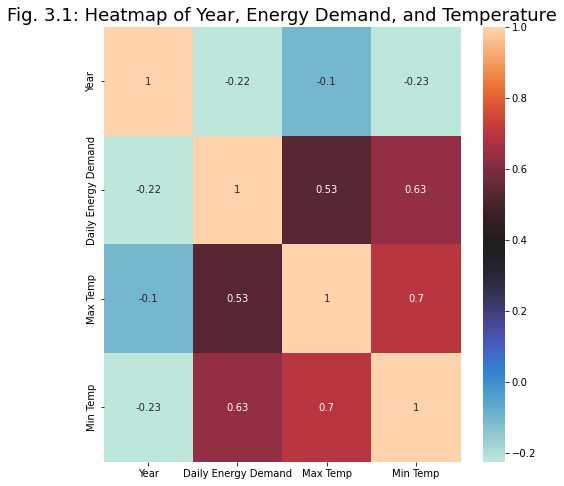

In [498]:
#Visualize the continuous feature correlation with a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='icefire', annot=True)
plt.title("Fig. 3.1: Heatmap of Year, Energy Demand, and Temperature", fontsize=18)

The min and max temp are somewhat correlated with daily energy demand. Since the minimum temperature is more correlated with energy demand than the maximum temperature, the minimum temperature will be focused on more heavily going forward. The year is not strongly correlated to any of the other continuous features.

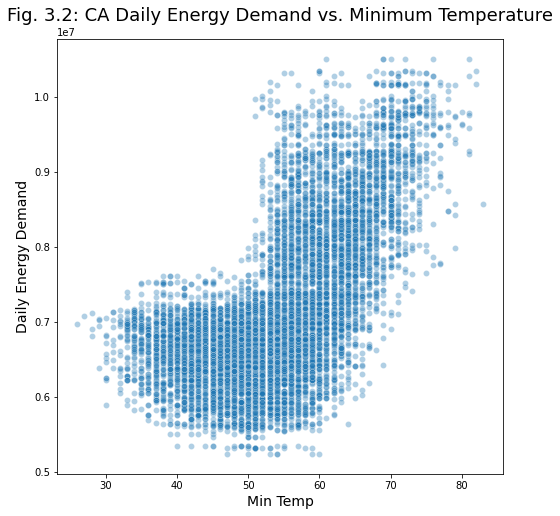

In [499]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x= 'Min Temp', y='Daily Energy Demand', alpha=0.35)
plt.title("Fig. 3.2: CA Daily Energy Demand vs. Minimum Temperature", fontsize=18, pad=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Figure 3.2 shows the correlation between the minimum temperature and the daily energy demand. Since the data points tend to fall along the diagonal, there is some correlation between these two variables, particularly at higher temperatures.

In [500]:
#defining an intuitive order to the months and days for future plotting purposes
dayorder= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthorder= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

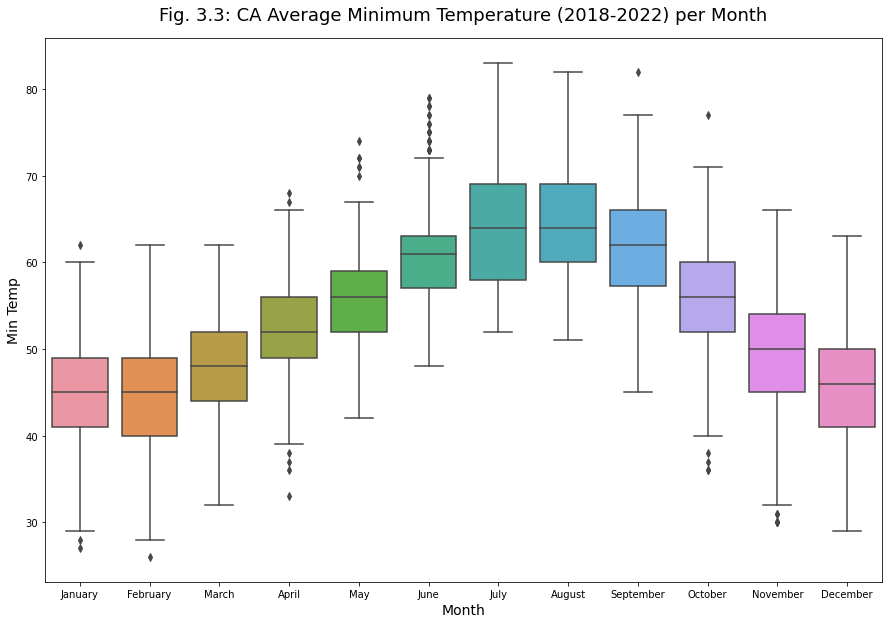

In [501]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x= 'Month', y='Min Temp', order=monthorder)
plt.title("Fig. 3.3: CA Average Minimum Temperature (2018-2022) per Month", fontsize=18, pad=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

The overall distribution of minimum temperature values in the dataframe. As expected, the average temperature is highest in the summer months. However, California has a large geographic footprint and its various regions have differing climates and weather patterns. 

To gain an orientation of these locations, they can be plotted as a function of their latitude and longitude.

## 3.2 Geographic Weather Data Exploration

In [502]:
df['Station ID'].unique()

array(['GHCND:USW00023174', 'GHCND:USW00023188', 'GHCND:USW00023272',
       'GHCND:USW00093193', 'GHCND:USW00023293', 'GHCND:USW00003102',
       'GHCND:USW00093225'], dtype=object)

In [503]:
#collected latitude and longitude station values using the station ID at https://www.ncdc.noaa.gov/
lat = {'Los Angeles Coastal': 33.93816, 'San Diego': 32.7336, 'San Francisco': 37.7705, 
       'Sacramento': 38.70069, 'San Jose': 37.35938, 'Los Angeles Inland': 34.05314, 'Fresno': 36.77999}

long = {'Los Angeles Coastal': -118.3866, 'San Diego': -117.1831, 'San Francisco': -122.4269, 
       'Sacramento': -121.59479, 'San Jose': -121.92444, 'Los Angeles Inland': -117.57689, 'Fresno':  -119.72016}


In [504]:
#creating a small dataframe for the latitude/longitude plot
geodf= pd.DataFrame(['Los Angeles Coastal', 'San Diego', 'San Francisco', 'Fresno',
       'San Jose', 'Los Angeles Inland', 'Sacramento'])
geodf.columns = ['Location Name']
geodf['Latitude']=geodf['Location Name'].map(lat)
geodf['Longitude']=geodf['Location Name'].map(long)

In [505]:
geodf

,Location Name,Latitude,Longitude
0,Los Angeles Coastal,33.93816,-118.38660
1,San Diego,32.73360,-117.18310
2,San Francisco,37.77050,-122.42690
3,Fresno,36.77999,-119.72016
4,San Jose,37.35938,-121.92444
5,Los Angeles Inland,34.05314,-117.57689
6,Sacramento,38.70069,-121.59479


In [506]:
import fiona

In [507]:
import geopandas

In [508]:
ca = geopandas.read_file('CA_State_TIGER2016.shp')

In [509]:
ca.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13..."


In [510]:
#changing the geospatial reference system identifier to “EPSG:4326” WGS84 Latitude/Longitude
ca = ca.to_crs("EPSG:4326")

In [511]:
locations= geodf['Location Name']
longitude= geodf['Longitude']
latitude= geodf['Latitude']


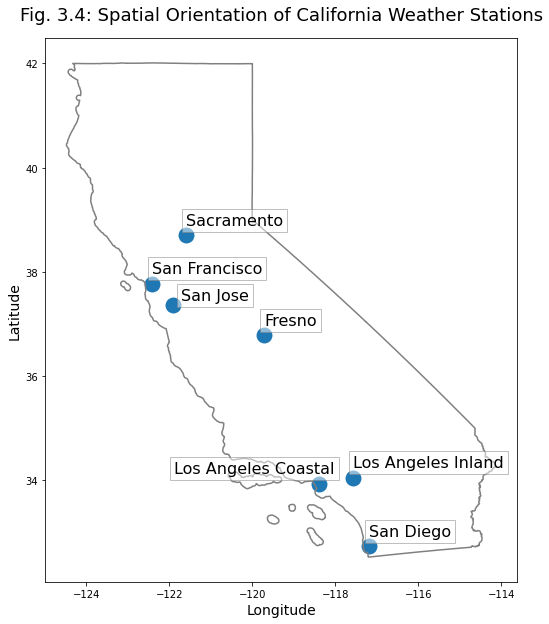

In [512]:
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot()
ca.boundary.plot(ax=ax, figsize=(10,10), color='gray')

sns.scatterplot(x='Longitude',y='Latitude',data=geodf, ax=ax, s=300)
plt.title("Fig. 3.4: Spatial Orientation of California Weather Stations", fontsize=18, pad=18)

font = {'family' : 'normal',
        'size'   : 16}

#add location labels to the data points
n=0
for i, location in enumerate (locations):
    n += 1
    if n == 1: #change label location for LA Coastal by adjusting longtidude x coordinate for label
        t = plt.text(longitude[i]-3.5, latitude[i]+0.2, location, **font)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        
    elif n == 5: #change San Jose label location
        t = plt.text(longitude[i]+0.2, latitude[i]+0.1, location, **font)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        
    else: #all other label locations can be placed with the same +0.2 lat y coordinate
        t = plt.text(longitude[i], latitude[i]+0.2, location, **font)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        



Text(0.5, 1.0, 'Fig. 3.5: CA Average Minimum Temperature (2018-2022) per Weather Station')

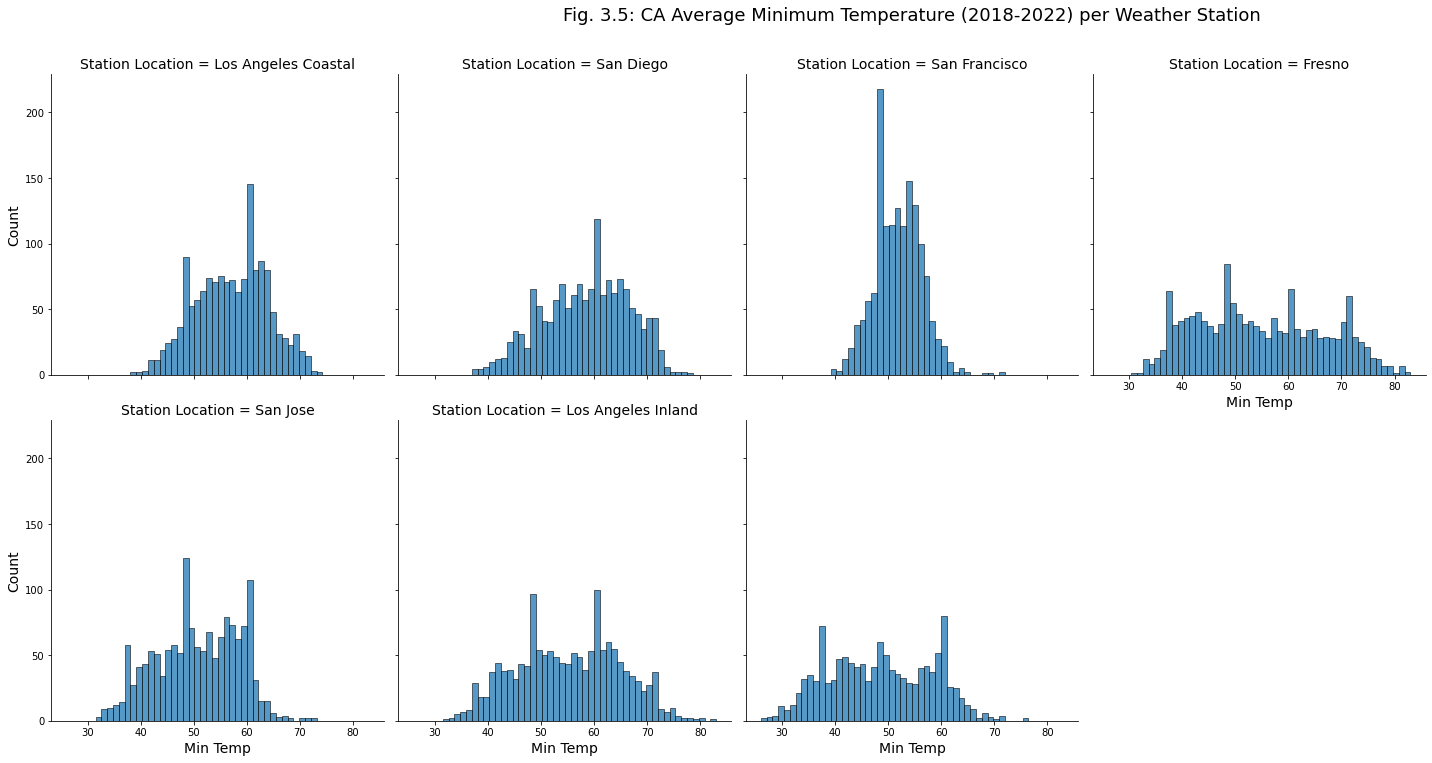

In [513]:

sns.displot(df, x='Min Temp', col='Station Location',col_wrap= 4)
plt.title("Fig. 3.5: CA Average Minimum Temperature (2018-2022) per Weather Station", fontsize=18, pad=400)

Text(0.5, 1.0, "Fig. 3.6: Average Minimum Temperature ('18-'22) per Weather Station")

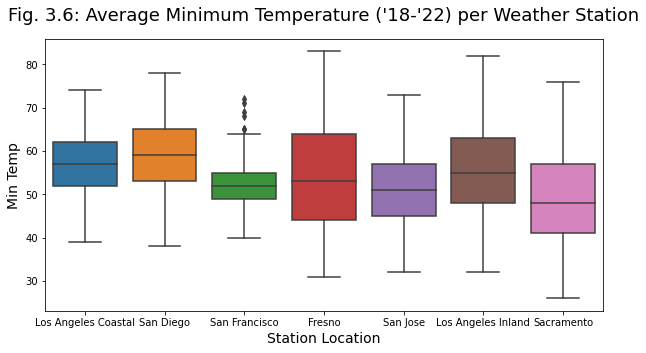

In [514]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x= 'Station Location', y='Min Temp')
plt.title("Fig. 3.6: Average Minimum Temperature ('18-'22) per Weather Station", fontsize=18, pad=18)

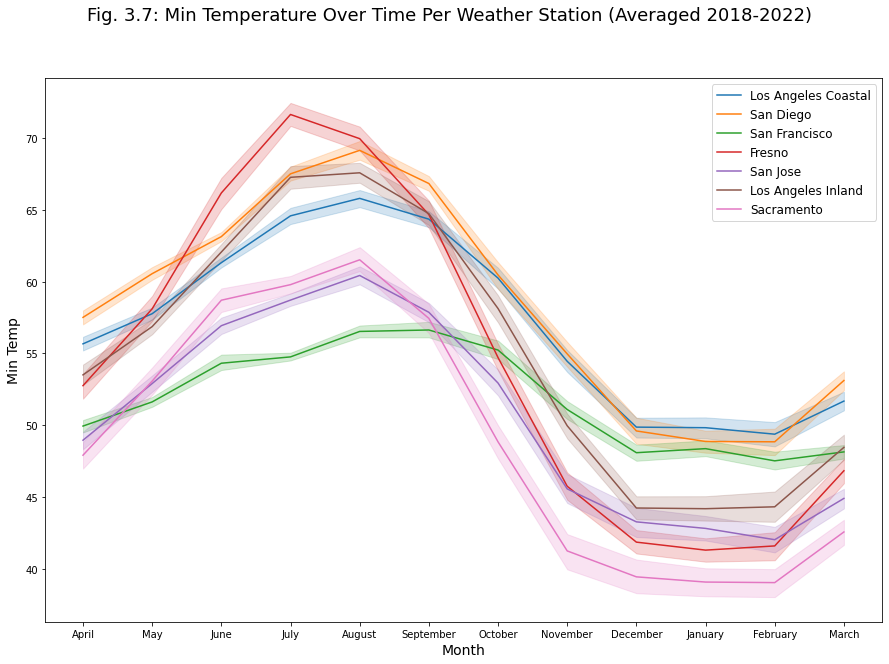

In [515]:
fig= plt.figure(figsize=(15,10))
plt.suptitle("Fig. 3.7: Min Temperature Over Time Per Weather Station (Averaged 2018-2022)", fontsize = 18)

sns.lineplot(data=df, x='Month', y='Min Temp', hue='Station Location')
plt.legend(fontsize=12)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [516]:
df.drop('Year', axis=1).groupby('Station Location').corr()

Daily Energy Demand  Max Temp  \
Station Location                                                         
Fresno              Daily Energy Demand             1.000000  0.712190   
                    Max Temp                        0.712190  1.000000   
                    Min Temp                        0.748328  0.928668   
Los Angeles Coastal Daily Energy Demand             1.000000  0.475748   
                    Max Temp                        0.475748  1.000000   
                    Min Temp                        0.690034  0.630020   
Los Angeles Inland  Daily Energy Demand             1.000000  0.690351   
                    Max Temp                        0.690351  1.000000   
                    Min Temp                        0.732653  0.814865   
Sacramento          Daily Energy Demand             1.000000  0.672503   
                    Max Temp                        0.672503  1.000000   
                    Min Temp                        0.673701  0.826329   
San Diego           Daily Energy Demand             1.000000  0.562095   
                    Max Temp                        0.562095  1.000000   
                    Min Temp                        0.676093  0.562093   
San Francisco       Daily Energy Demand             1.000000  0.389378   
                    Max Temp                        0.389378  1.000000   
                    Min Temp                        0.578276  0.706821   
San Jose            Daily Energy Demand             1.000000  0.620161   
                    Max Temp                        0.620161  1.000000   
                    Min Temp                        0.683187  0.755880   

                                         Min Temp  
Station Location                                   
Fresno              Daily Energy Demand  0.748328  
                    Max Temp             0.928668  
                    Min Temp             1.000000  
Los Angeles Coastal Daily Energy Demand  0.690034  
                    Max Temp             0.630020  
                    Min Temp             1.000000  
Los Angeles Inland  Daily Energy Demand  0.732653  
                    Max Temp             0.814865  
                    Min Temp             1.000000  
Sacramento          Daily Energy Demand  0.673701  
                    Max Temp             0.826329  
                    Min Temp             1.000000  
San Diego           Daily Energy Demand  0.676093  
                    Max Temp             0.562093  
                    Min Temp             1.000000  
San Francisco       Daily Energy Demand  0.578276  
                    Max Temp             0.706821  
                    Min Temp             1.000000  
San Jose            Daily Energy Demand  0.683187  
                    Max Temp             0.755880  
                    Min Temp             1.000000

In [517]:
df.drop('Year', axis=1).groupby('Station Location').corr()

Daily Energy Demand  Max Temp  \
Station Location                                                         
Fresno              Daily Energy Demand             1.000000  0.712190   
                    Max Temp                        0.712190  1.000000   
                    Min Temp                        0.748328  0.928668   
Los Angeles Coastal Daily Energy Demand             1.000000  0.475748   
                    Max Temp                        0.475748  1.000000   
                    Min Temp                        0.690034  0.630020   
Los Angeles Inland  Daily Energy Demand             1.000000  0.690351   
                    Max Temp                        0.690351  1.000000   
                    Min Temp                        0.732653  0.814865   
Sacramento          Daily Energy Demand             1.000000  0.672503   
                    Max Temp                        0.672503  1.000000   
                    Min Temp                        0.673701  0.826329   
San Diego           Daily Energy Demand             1.000000  0.562095   
                    Max Temp                        0.562095  1.000000   
                    Min Temp                        0.676093  0.562093   
San Francisco       Daily Energy Demand             1.000000  0.389378   
                    Max Temp                        0.389378  1.000000   
                    Min Temp                        0.578276  0.706821   
San Jose            Daily Energy Demand             1.000000  0.620161   
                    Max Temp                        0.620161  1.000000   
                    Min Temp                        0.683187  0.755880   

                                         Min Temp  
Station Location                                   
Fresno              Daily Energy Demand  0.748328  
                    Max Temp             0.928668  
                    Min Temp             1.000000  
Los Angeles Coastal Daily Energy Demand  0.690034  
                    Max Temp             0.630020  
                    Min Temp             1.000000  
Los Angeles Inland  Daily Energy Demand  0.732653  
                    Max Temp             0.814865  
                    Min Temp             1.000000  
Sacramento          Daily Energy Demand  0.673701  
                    Max Temp             0.826329  
                    Min Temp             1.000000  
San Diego           Daily Energy Demand  0.676093  
                    Max Temp             0.562093  
                    Min Temp             1.000000  
San Francisco       Daily Energy Demand  0.578276  
                    Max Temp             0.706821  
                    Min Temp             1.000000  
San Jose            Daily Energy Demand  0.683187  
                    Max Temp             0.755880  
                    Min Temp             1.000000

<AxesSubplot:title={'center':'Fig. 3.8: Heatmap of Daily Energy Demand and Temperature per Weather Station'}, ylabel='Station Location-None'>

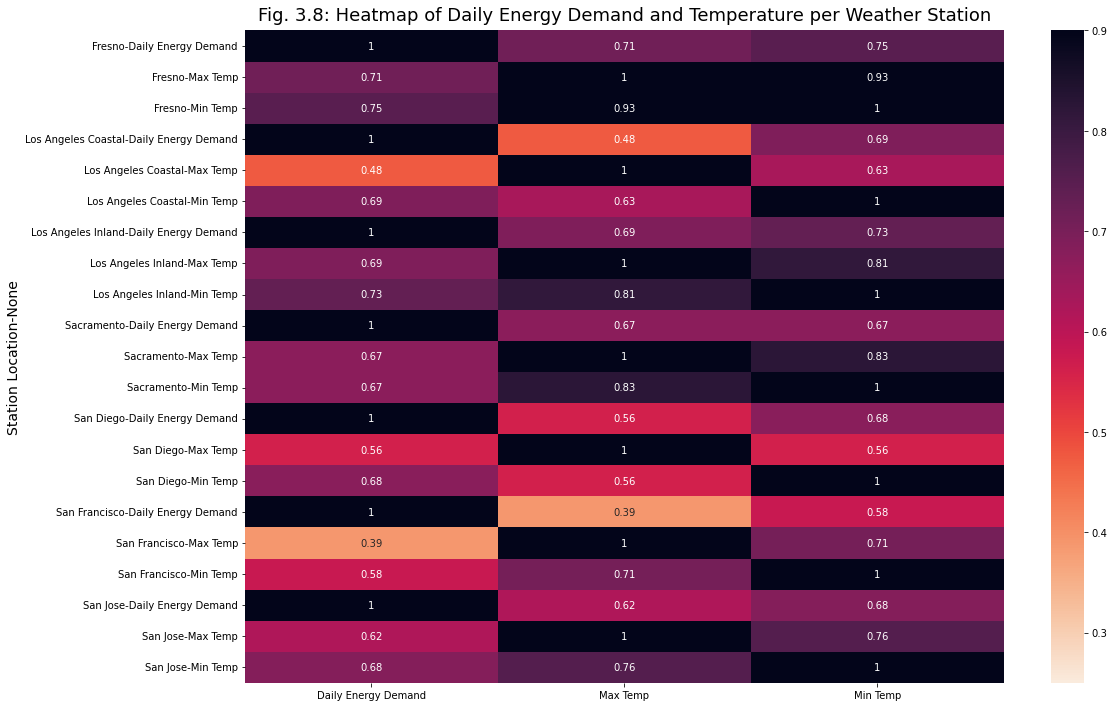

In [518]:
plt.figure(figsize=(17,12))
plt.title("Fig. 3.8: Heatmap of Daily Energy Demand and Temperature per Weather Station", fontsize=18, pad=10)
sns.heatmap(df.drop('Year', axis=1).groupby('Station Location').corr(), cmap='rocket_r', vmax=0.9, vmin=0.25, annot=True)

Fresno's temps correlate most with the Daily Energy Demand. LA's inland temp's are also fairly well correlated, may be worth seeing the effect of combining the LA inland and coastal regions.

### 3.2.2 Combining LA's Temperature Data

Since Los Angeles is near the coast and has a large degree of variability in its temperature across the county, and simultaneously has the states most populated area, two stations were used to collect data. However, it is possible that by grouping these locations together, the correlation between the temperatures and the energy demand would actually increase. To examine this:

In [519]:
la_df = df[(df['Station Location']=='Los Angeles Coastal') | (df['Station Location']=='Los Angeles Inland')]

In [520]:
la_df.corr()['Daily Energy Demand']

Year                  -0.229460
Daily Energy Demand    1.000000
Max Temp               0.543862
Min Temp               0.699874
Name: Daily Energy Demand, dtype: float64

That actually made things worse in terms of predicting the daily energy demand, likely because LA's coastal max temp is so poorly correlated with the data and the majority of the county's population does not live right along the coast.

### 3.2.3 Looking at Fresno's Data in More Detail

Fresno's temperature data was more highly correlated with the state's energy demand. Let's analyze this more closely.

In [521]:
fresno_df = df[df['Station Location']=='Fresno']

In [522]:
fresno_df.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193
9,2018-04-11,04/11/2018,Wednesday,April,2018,6927243.5,75.0,51.0,Fresno,GHCND:USW00093193
15,2018-04-12,04/12/2018,Thursday,April,2018,6670701.0,65.0,47.0,Fresno,GHCND:USW00093193
21,2018-04-13,04/13/2018,Friday,April,2018,6643068.0,71.0,44.0,Fresno,GHCND:USW00093193
27,2018-04-14,04/14/2018,Saturday,April,2018,6183992.0,81.0,48.0,Fresno,GHCND:USW00093193


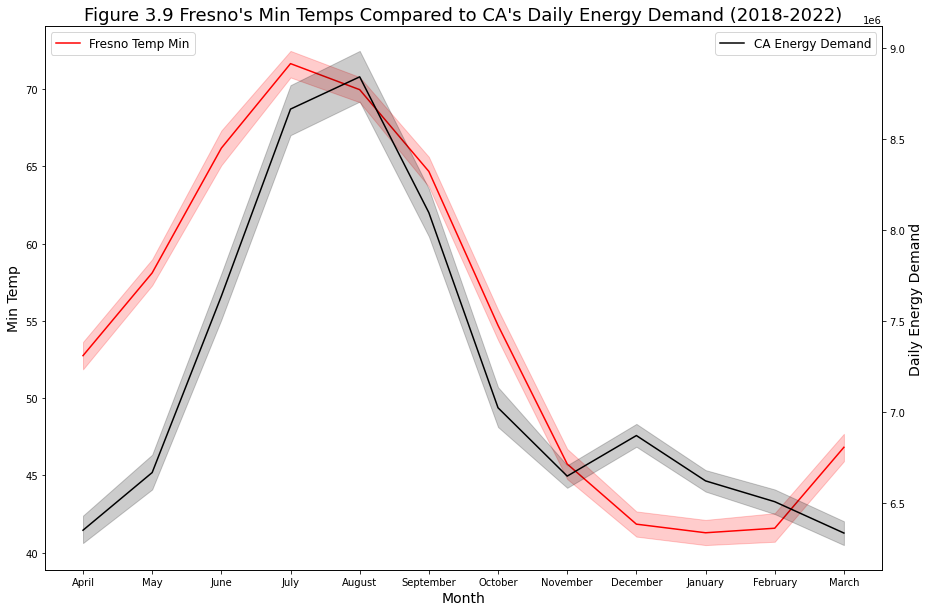

In [523]:
fig= plt.figure(figsize=(15,10))
plt.title("Figure 3.9 Fresno's Min Temps Compared to CA's Daily Energy Demand (2018-2022)", fontsize = 18)

sns.lineplot(data=fresno_df, x='Month', y='Min Temp', color='red')
plt.legend(labels=["Fresno Temp Min"], fontsize=12, loc=2)

ax2 = plt.twinx()
sns.lineplot(data=fresno_df, x='Month', y='Daily Energy Demand', ax=ax2, color='black')
plt.legend(labels=["CA Energy Demand"], fontsize=12, loc=1)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

The trends are similar between the two traces. The most notable deviation occurs in the spring when CA's energy demand does not rise as quickly as Fresno's temperatures. Perhaps Fresno heats up before the majority of the state because of it's geographical region (see Figure 3.4). Looking back at Fig. 3.7, it does show Fresno heating up more quickly than the other locations. This suggests some seasons more correlate more closely with the energy demand than others and it is a feature worth considering engineering.

First, let's make a new graph similar to the above one, but this time examining all of the seasonal data in relation to the energy demand to see if the seasonal deviation is unique to Fresno.

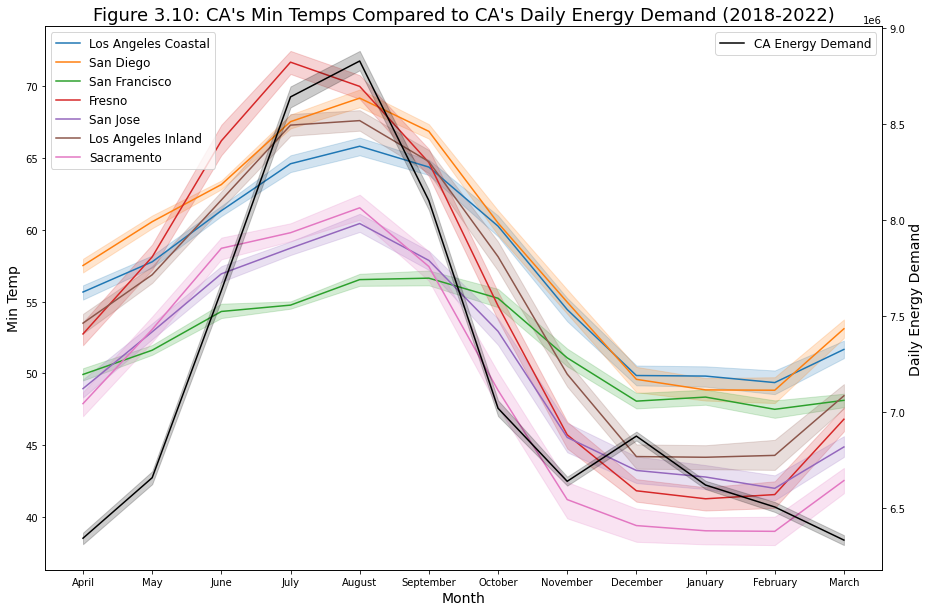

In [524]:
fig= plt.figure(figsize=(15,10))
plt.title("Figure 3.10: CA's Min Temps Compared to CA's Daily Energy Demand (2018-2022)", fontsize = 18)

sns.lineplot(data=df, x='Month', y='Min Temp', hue='Station Location', legend='full')
plt.legend(fontsize=12, loc=2)

ax2 = plt.twinx()
sns.lineplot(data=df, x='Month', y='Daily Energy Demand', ax=ax2, color='black')
plt.legend(labels=["CA Energy Demand"], fontsize=12, loc=1)

It does seem like the seasons affect how closely the energy demand trends with the temperatures, however, because of the wide distribution of temperature values it is difficult to visually assess how this relationship changes each month for the state as a whole. A quantitative analysis will be insightful.

## 3.3 Seasonal Effect on Energy Demand

Engineering a season feature based on the day of the year that a date occurs (1-366).

In [525]:
from datetime import date, datetime

In [526]:
df['Date-DateTime'] = pd.to_datetime((df['Date-DateTime']))

In [527]:
from datetime import date, datetime

def get_season(x):

   # extract day of the year from the date    
    doy =  x.day_of_year

    # "day of year" ranges for the northern hemisphere
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else

    if doy in spring:
      season = 'spring'
    elif doy in summer:
      season = 'summer'
    elif doy in fall:
      season = 'fall'
    else:
      season = 'winter'
    return season

In [528]:
df['Season']= df['Date-DateTime'].apply(lambda x: get_season(x))

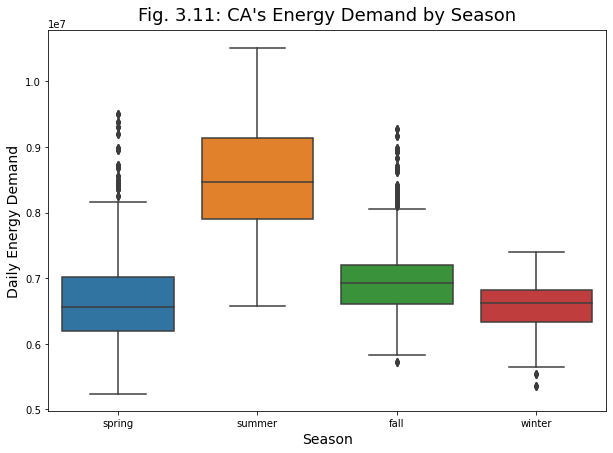

In [529]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Season'], y=df['Daily Energy Demand'])
plt.title("Fig. 3.11: CA's Energy Demand by Season", fontsize=18, pad=10)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

Text(1.0, 1.0, 'Fig. 3.12: Correlation between Energy Demand and Minimum Temperature, per Season')

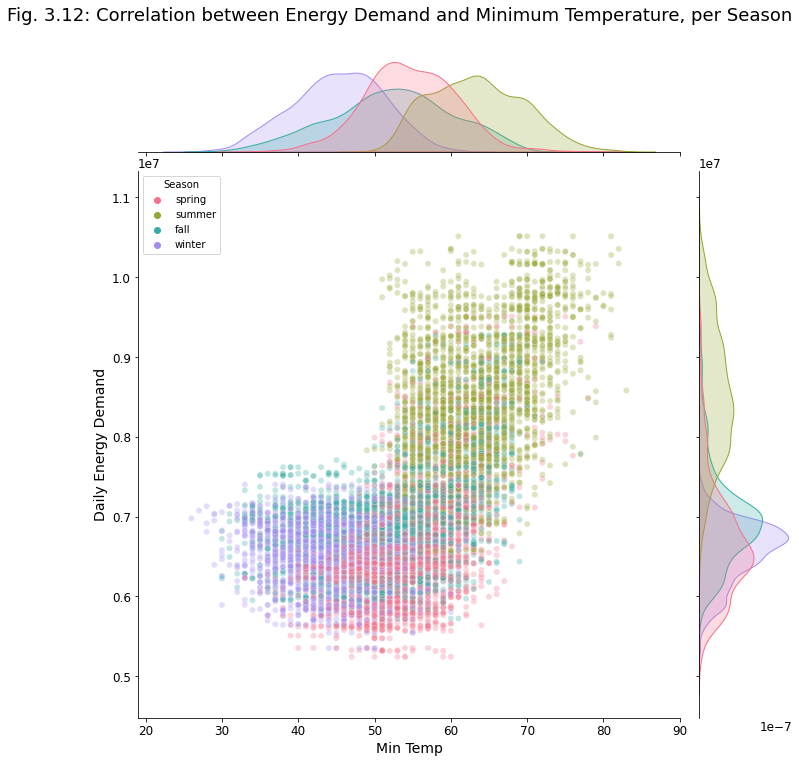

In [530]:

sns.jointplot(data=df, x='Min Temp', y='Daily Energy Demand', hue='Season', height=10, palette='husl', alpha=0.3)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.title("Fig. 3.12: Correlation between Energy Demand and Minimum Temperature, per Season", fontsize=18, pad=150, loc='right')

The daily energy demand is much higher in the summer than in the rest of the year, this corresponds with increased temperatures. It is interesting to note that the other seasons have a much broader temperature distribution than they do energy demand distribution. Let's examine this in more detail by getting quantitative values for the correlation.

Text(0.5, 1.0, 'Fig. 3.13: Correlation between Energy Demand and Minimum Temperature, per Season')

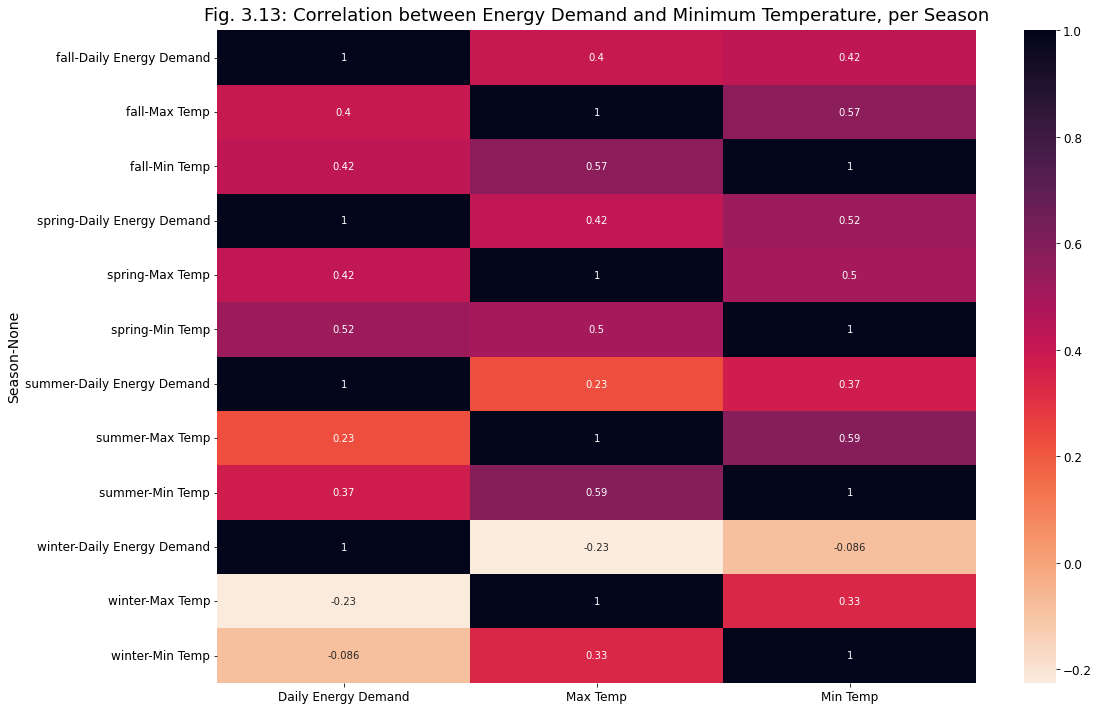

In [531]:
plt.figure(figsize=(17,12))
sns.heatmap(df.drop('Year', axis=1).groupby('Season').corr(), cmap='rocket_r', annot=True)
plt.title("Fig. 3.13: Correlation between Energy Demand and Minimum Temperature, per Season", fontsize=18, pad=10)

The quantitative data in the heatmap provides a more holistic understanding of what variables correlate to one another. Both summer and winter temperatures have worse correlation to the energy demand than spring and fall. Of note, the winter minimum temperatures have essentially no correlation with the energy demand! 

Two things may be going on here:
- In the winter, weather may be less of a predictor of energy demand because people are using gas-powered heating furnaces that are not pulling electricity from the grid.
- In the summer, California's large geographic footprint results in highly variable temperatures and additional data features like population density in each region could be important.


## 3.4 Weekend Effect on Energy Demand

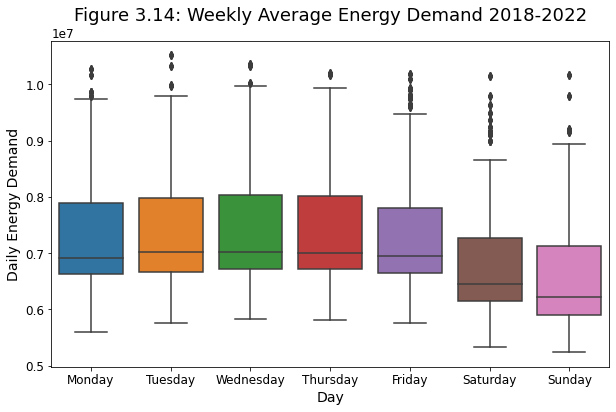

In [532]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x= 'Day', y='Daily Energy Demand', order= dayorder)
plt.title("Figure 3.14: Weekly Average Energy Demand 2018-2022", fontsize=18, pad=20)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Text(0.5, 1.0, 'Fig. 3.15: Correlation between Energy Demand and Day of the Week')

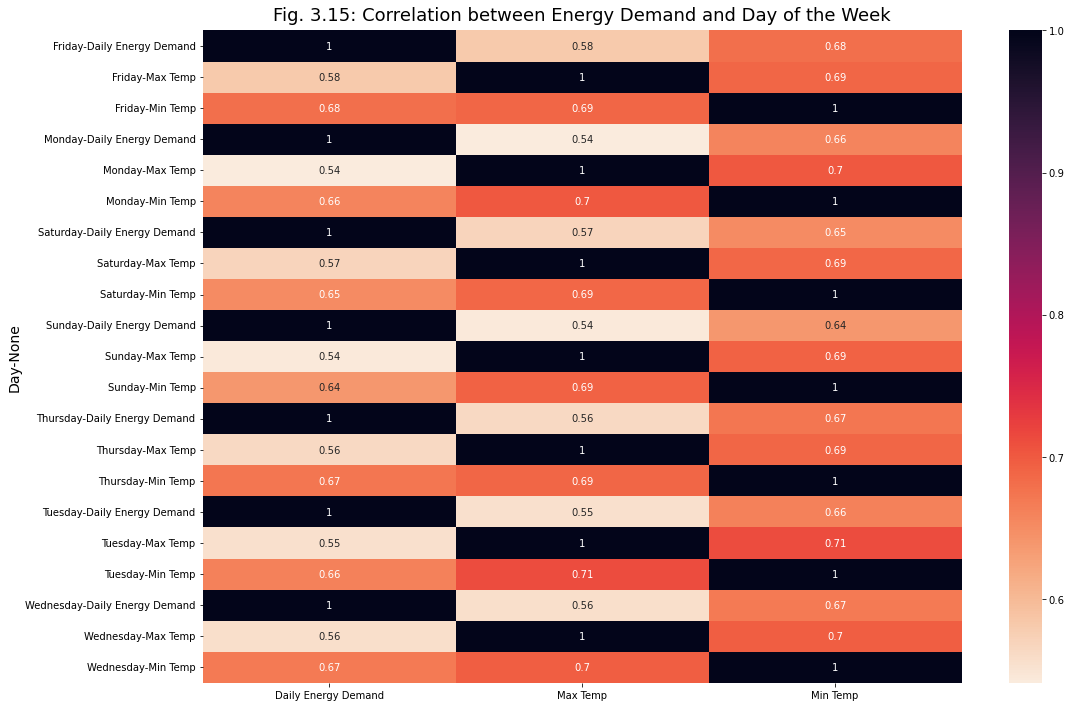

In [533]:
plt.figure(figsize=(17,12))
sns.heatmap(df.drop('Year', axis=1).groupby('Day').corr(), cmap='rocket_r', annot=True)
plt.title("Fig. 3.15: Correlation between Energy Demand and Day of the Week", fontsize=18, pad=10)

There isn't much difference in Daily Energy Demand correlation with temperatures when the data are grouped by days of the week. 

## 3.5 Encoding Time Information as Features

It will be useful for the model to recognize that January is similar to December and occurs immediately after it; in other words, setting up the data to represent the cyclical continuitity present with each year is important. Trigonometric transformations can be used to uncode the time into cyclical features.

In [534]:
from datetime import date
from sklearn.preprocessing import FunctionTransformer

In [535]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [536]:
df_2=df.copy()

In [537]:
dayofweekdict = {'Monday': 1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

In [538]:
#Considering the cyclical nature of the months and days of the week. Could have also done days of the year but since timeframe is only ~3.5 years, each day would only occur 3 or 4 times.
df_2['month_num']= df_2['Date-DateTime'].dt.month
df_2['dayofweek']= df_2['Day'].map(dayofweekdict)

In [539]:
df_2.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID,Season,month_num,dayofweek
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174,spring,4,2
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188,spring,4,2
2,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272,spring,4,2
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193,spring,4,2
4,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293,spring,4,2


In [540]:
#12 months in the year
df_2['month_sin']=sin_transformer(12).fit_transform(df_2['month_num'])
df_2['month_cos']=cos_transformer(12).fit_transform(df_2['month_num'])

#7 days in the week
df_2['day_sin']=sin_transformer(7).fit_transform(df_2['dayofweek'])
df_2['day_cos']=cos_transformer(7).fit_transform(df_2['dayofweek'])

In [541]:
df_2.head(2)

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID,Season,month_num,dayofweek,month_sin,month_cos,day_sin,day_cos
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174,spring,4,2,0.866025,-0.5,0.974928,-0.222521
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188,spring,4,2,0.866025,-0.5,0.974928,-0.222521


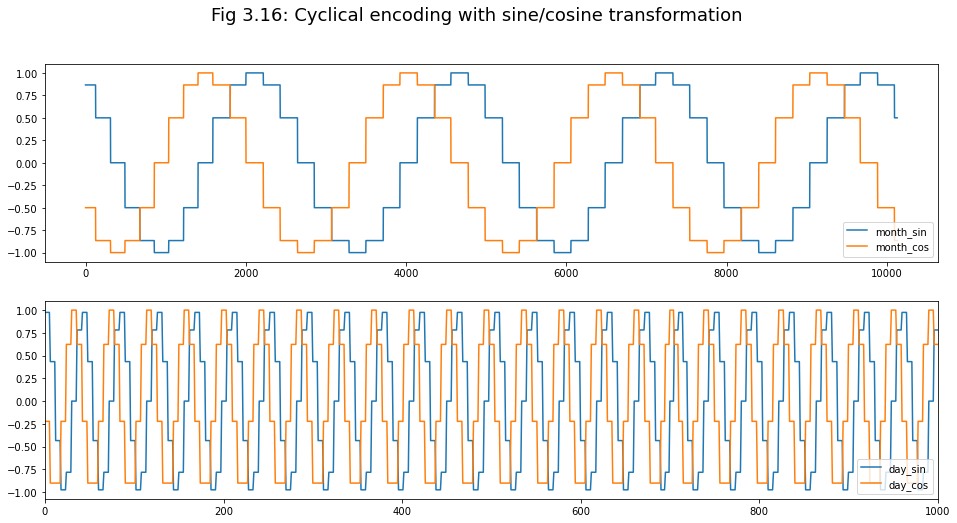

In [542]:
fig, ax = plt.subplots(2, 1, figsize=(16,8))
df_2[["month_sin", "month_cos"]].plot(ax=ax[0])
df_2[["day_sin", "day_cos"]].plot(ax=ax[1], xlim=(0,1000))
plt.suptitle("Fig 3.16: Cyclical encoding with sine/cosine transformation", fontsize=18)
plt.legend( loc=4)

Step-wise curves for the months, with smoother steps for the days of the week.

Note that the axis range on the day sine/cosine transformation has been limited to the first 1000 days for visualization purposes.

Two curves, both a sine and a cosine curve, must be used so that each time point can be uniquely identified and there are no overlapping values. This is more clear when plotting the values of the sine/cosine functions in a scatter plot, as shown below.



<AxesSubplot:title={'center':'Fig 3.17.b: Unique Day (sin,cos) Vectors'}, xlabel='day_sin', ylabel='day_cos'>

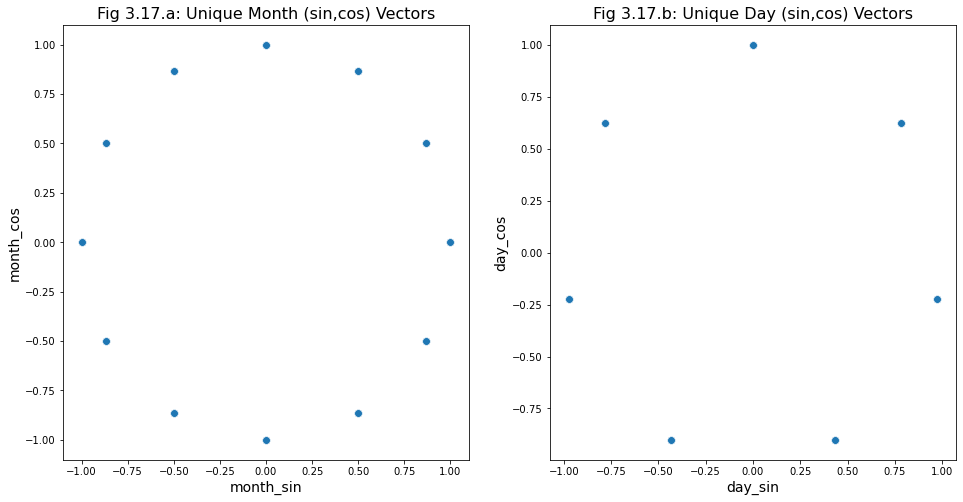

In [543]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].set_title("Fig 3.17.a: Unique Month (sin,cos) Vectors", fontsize=16, loc='center')
sns.scatterplot(x=df_2['month_sin'], y=df_2['month_cos'], ax=axs[0], s=60)
axs[1].set_title("Fig 3.17.b: Unique Day (sin,cos) Vectors", fontsize=16, loc='center')
sns.scatterplot(x=df_2['day_sin'], y=df_2['day_cos'], ax=axs[1], s=60)

As can be seen by the above plots, it is necessary to consider both the sin and cosine curves simultaneously to uniquely identify a given time point. This is important to note because if a tree-based model is used for the data, the model will split based on a single feature at the time, thereby being unable to precisely know the month and day of the week.

## 3.6 Creating dummy variables for the station location 

In [544]:
df_2.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID,Season,month_num,dayofweek,month_sin,month_cos,day_sin,day_cos
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174,spring,4,2,0.866025,-0.5,0.974928,-0.222521
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188,spring,4,2,0.866025,-0.5,0.974928,-0.222521
2,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272,spring,4,2,0.866025,-0.5,0.974928,-0.222521
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193,spring,4,2,0.866025,-0.5,0.974928,-0.222521
4,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293,spring,4,2,0.866025,-0.5,0.974928,-0.222521


The month sin/cos features and day of the week sin/cos features will capture all of the information from the date, day, season and month columns, so those can be dropped.

In [545]:
df_2.drop(['Date-DateTime', 'Date', 'Day', 'Month', 'Season', 'month_num', 'dayofweek'], axis=1, inplace=True)

In [546]:
df_2.head()

,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID,month_sin,month_cos,day_sin,day_cos
0,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174,0.866025,-0.5,0.974928,-0.222521
1,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188,0.866025,-0.5,0.974928,-0.222521
2,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272,0.866025,-0.5,0.974928,-0.222521
3,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193,0.866025,-0.5,0.974928,-0.222521
4,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293,0.866025,-0.5,0.974928,-0.222521


Create dummy variables for the station location

In [547]:
dummies = pd.get_dummies(df_2['Station Location'],drop_first=True) #dropping first column to prevent having repeated data in the df
df_2 = df_2.drop(['Station Location', 'Station ID'],axis=1)
df_2 = pd.concat([df_2,dummies],axis=1)

In [548]:
df_2.head(10)

,Year,Daily Energy Demand,Max Temp,Min Temp,month_sin,month_cos,day_sin,day_cos,Los Angeles Coastal,Los Angeles Inland,Sacramento,San Diego,San Francisco,San Jose
0,2018,7183786.0,79.0,60.0,0.866025,-0.5,0.974928,-0.222521,1,0,0,0,0,0
1,2018,7183786.0,85.0,60.0,0.866025,-0.5,0.974928,-0.222521,0,0,0,1,0,0
2,2018,7183786.0,63.0,52.0,0.866025,-0.5,0.974928,-0.222521,0,0,0,0,1,0
3,2018,7183786.0,86.0,59.0,0.866025,-0.5,0.974928,-0.222521,0,0,0,0,0,0
4,2018,7183786.0,69.0,52.0,0.866025,-0.5,0.974928,-0.222521,0,0,0,0,0,1
5,2018,7183786.0,94.0,60.0,0.866025,-0.5,0.974928,-0.222521,0,1,0,0,0,0
6,2018,6927243.5,74.0,57.0,0.866025,-0.5,0.433884,-0.900969,1,0,0,0,0,0
7,2018,6927243.5,73.0,60.0,0.866025,-0.5,0.433884,-0.900969,0,0,0,1,0,0
8,2018,6927243.5,60.0,49.0,0.866025,-0.5,0.433884,-0.900969,0,0,0,0,1,0
9,2018,6927243.5,75.0,51.0,0.866025,-0.5,0.433884,-0.900969,0,0,0,0,0,0


In [549]:
len(df_2)

10131

In [550]:
#7 station locations
365*7

2555

2555 test values desired to have the last year as the test data set

## 3.7 Train Test Split

The most recent 365 of data in the dataframe represent the last 2555 rows of the dataframe. These will be defined as the test set to determine if the model can effectively forecast future energy demand for a year.

In [631]:
df_2.shape

(10131, 14)

In [632]:
from sklearn.model_selection import train_test_split
# X = df_2.drop('Daily Energy Demand',axis=1).values
# y = df_2['Daily Energy Demand'].values

In [633]:
X = df_2.drop('Daily Energy Demand',axis=1).copy()
y = df_2['Daily Energy Demand'].copy()

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2555, random_state=101, shuffle=False)
#shuffle = false because it is a time series

In [635]:
X_train.shape

(7576, 13)

The shapes of each dataframe are what is expected. The training df is one column shorter because the label column has been dropped.

In [636]:
initial_indicies = y_test.index

In [ ]:
#good, indeces start at the last 2555 rows in the df
y_test.index

In [638]:
X_test.index

Int64Index([ 7576,  7577,  7578,  7579,  7580,  7581,  7582,  7583,  7584,
             7585,
            ...
            10121, 10122, 10123, 10124, 10125, 10126, 10127, 10128, 10129,
            10130],
           dtype='int64', length=2555)

In [639]:
months_for_each_y_test = df.loc[initial_indicies, ["Month", "Year"]]

In [640]:
jan_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="January"].index
feb_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="February"].index
mar_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="March"].index
apr_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="April"].index
may_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="May"].index
jun_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="June"].index
jul_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="July"].index
aug_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="August"].index
sep_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="September"].index
oct_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="October"].index
nov_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="November"].index
dec_idx = months_for_each_y_test[months_for_each_y_test["Month"]=="December"].index

jan_idx = [True if x in jan_idx else False for x in initial_indicies]
feb_idx = [True if x in feb_idx else False for x in initial_indicies]
mar_idx = [True if x in mar_idx else False for x in initial_indicies]
apr_idx = [True if x in apr_idx else False for x in initial_indicies]
may_idx = [True if x in may_idx else False for x in initial_indicies]
jun_idx = [True if x in jun_idx else False for x in initial_indicies]
jul_idx = [True if x in jul_idx else False for x in initial_indicies]
aug_idx = [True if x in aug_idx else False for x in initial_indicies]
sep_idx = [True if x in sep_idx else False for x in initial_indicies]
oct_idx = [True if x in oct_idx else False for x in initial_indicies]
nov_idx = [True if x in nov_idx else False for x in initial_indicies]
dec_idx = [True if x in dec_idx else False for x in initial_indicies]

## 3.8 Normalizing the Data

In [641]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Don't want data leakage from the test set so only fit on the X_train data.

## 3.9 Defining the Model

In [642]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

Started with a common rule-of-thumb for decent layer configuration- the number of hidden layers is one and the number of nuerons in that layer is the mean of the neurons in the input and output layer. However, with this architecture, the model performed horribly. This is not terribly surprising because while there are not many features, the data are not at all linearly spaced and the model may need more neurons and hidden layers to fit the data. Through trial and error, the below model was established.

Using dropout layers to prevent overfitting.

In [643]:
#sequential model is the simplest and involves adding layers to the model one by one
model = Sequential()

#13 features in data set, so starting with 13 inputs
model.add(Dense(750, input_shape=(13,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(450, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(75, activation = 'relu'))
model.add(Dropout(0.3))

#output layer
#NN is a regressor so output layer has a single node 
model.add(Dense(1))

#compiling the model- selected a mean squared error loss function because the labels are continuous (a regression problem)
#selected the Adam algorithm (a modern variation on a stochastic gradient) to perform the optimization procedure
model.compile (optimizer = 'adam', loss= 'mse')


Using `EarlyStopping` so that the model stops the training once it has stopped improving the validation loss

In [644]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 25)
#looks for when validation loss starts to increase, showing signs of overfitting, and after a grace period it stops training the model.

## 3.10 Fitting the Model

In [645]:
model.fit(x=X_train,
         y=y_train,
         epochs = 1000,
         batch_size = 128,
         validation_data = (X_test, y_test), verbose =1, #quickly check loss with test data, this will not update the model based on the test data
         callbacks = [early_stop])

Epoch 1/1000
60/60 [==============================] - 1s 9ms/step - loss: 52311015555072.0000 - val_loss: 51729903124480.0000
Epoch 2/1000
60/60 [==============================] - 0s 6ms/step - loss: 42387346817024.0000 - val_loss: 15439228829696.0000
Epoch 3/1000
60/60 [==============================] - 0s 6ms/step - loss: 5890628911104.0000 - val_loss: 2623341592576.0000
Epoch 4/1000
60/60 [==============================] - 0s 7ms/step - loss: 3431907459072.0000 - val_loss: 2430151950336.0000
Epoch 5/1000
60/60 [==============================] - 0s 6ms/step - loss: 3060486373376.0000 - val_loss: 2076910288896.0000
Epoch 6/1000
60/60 [==============================] - 0s 6ms/step - loss: 2683590672384.0000 - val_loss: 1656406802432.0000
Epoch 7/1000
60/60 [==============================] - 0s 7ms/step - loss: 2400959070208.0000 - val_loss: 1454603894784.0000
Epoch 8/1000
60/60 [==============================] - 1s 9ms/step - loss: 2137962446848.0000 - val_loss: 1229775044608.0000
Epoc

## 3.11 Evaluating Model Performance

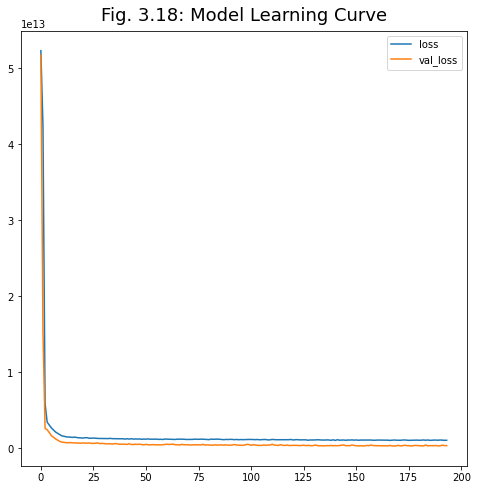

In [646]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot(figsize=(8,8))
plt.title("Fig. 3.18: Model Learning Curve", fontsize=18, pad=10)                                 
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Loss looks really good, no signs of overfitting. Evident by the decrease in both the training and validation loss traces, and no increase in validation set that would indicate overfitting.

In [647]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

Later on, once the model is optimized we will want to be able to see how the predictions matched the true values for each month. Setting that up now by creating a dataframe with predicted labels, true labels, and the month.

In [648]:
predictions = model.predict(X_test)

80/80 [==============================] - 0s 3ms/step


In [649]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
np.format_float_scientific(rmse)

'5.92352699488303e+05'

**RMSE = 5.92e+05**

In [650]:
#how much variance is being explained by the model, best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.7250493671194034

In [651]:
df_2['Daily Energy Demand'].describe()

count    1.013100e+04
mean     7.165228e+06
std      1.024042e+06
min      5.242117e+06
25%      6.463575e+06
50%      6.892062e+06
75%      7.740056e+06
max      1.051364e+07
Name: Daily Energy Demand, dtype: float64

Text(0.5, 1.0, 'Fig. 3.19:Predicted vs. Actual ')

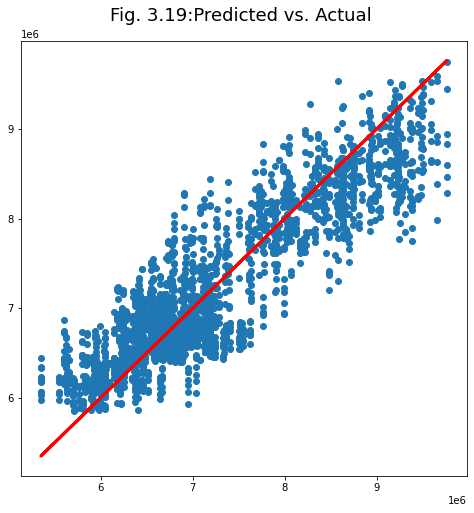

In [723]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.figure(figsize=(8,8))                                

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r', linewidth=3)

plt.title("Fig. 3.19: Predicted vs. Actual ", fontsize=18, pad=20) 

##  3.12 Examining Effect of Batch Normalization on the Neural Network

Batch normalization standardizes the inputs to a layer for each mini-batch, however, it should not be used with dropout layers (they can make the standardization statistics too noisy) so let's remove those and see how the model performs.

In [653]:
from tensorflow.keras.layers import BatchNormalization

In [654]:

model = Sequential()
model.add(Dense(750, input_shape=(13,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(450, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(75, activation = 'relu'))
model.add(Dense(1))
model.compile (optimizer = 'adam', loss= 'mse')

early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 25)


In [655]:
model.fit(x=X_train,
         y=y_train,
         epochs = 1000,
         batch_size = 128,
         validation_data = (X_test, y_test), verbose =0, 
         callbacks = [early_stop])

Epoch 50: early stopping


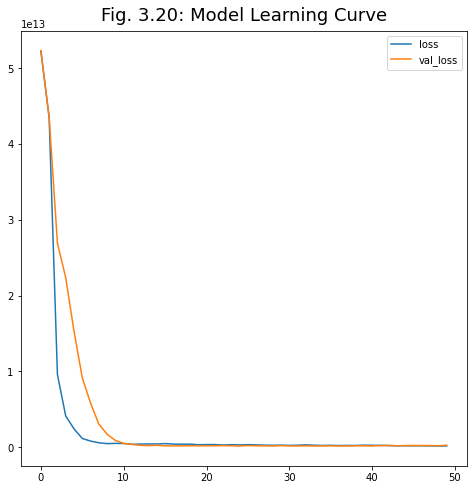

In [656]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot(figsize=(8,8))
plt.title("Fig. 3.20: Model Learning Curve", fontsize=18, pad=10)                                 
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [657]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
np.format_float_scientific(rmse)

80/80 [==============================] - 0s 3ms/step


'5.244994000996422e+05'

**RMSE = 5.24e+05**

In [658]:
explained_variance_score(y_test,predictions)

0.7940817473291018

Text(0.5, 1.0, 'Fig. 3.21: Predicted vs. Actual ')

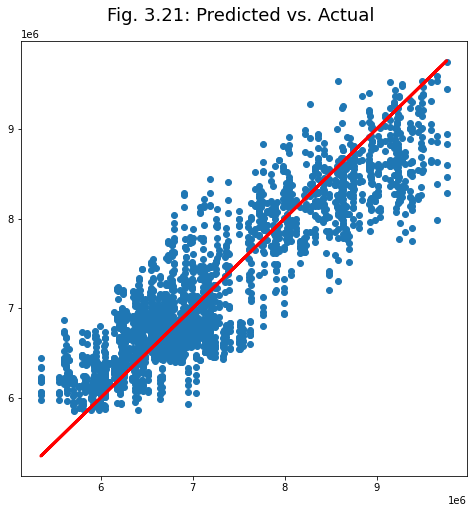

In [724]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.figure(figsize=(8,8))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r', linewidth=3)

plt.title("Fig. 3.21: Predicted vs. Actual ", fontsize=18, pad=20) 

Using a `BatchNormalization` layer improved the performance.


## 3.13 Automated Model Hyperparameter Tuning

Using trial and error methods above, it was clear that the number of model layers, nodes per layer, and use of `BatchNormalization` significantly impacts model performance. A decent model was found by manually tuning the hyper parameters, but Keras Tuner can be used to further optimize the hyperparameters. Keras Tuner is an optimization framework that will be used to automate the tuning of the number of hidden layers, the number of nodes per layer, the batch normalization of layers, and the learning rate.

In [676]:
import keras_tuner as kt

In [677]:
#defining the model skeleton 
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """


    # Initialize sequential API and start building model.
    model = Sequential()
    model.add(tf.keras.Input(shape=(13,)))
    

    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of nodes: 7 - 807 with stepsize of 50
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            Dense(
                units=hp.Int("units_" + str(i), min_value=7, max_value=807, step=50),
                activation="relu")
            )
        if i==1:
            if hp.Boolean("BatchNorm1"):
                model.add(BatchNormalization())
                
        elif i==2:
            if hp.Boolean("BatchNorm2"):
                model.add(BatchNormalization())
                
        elif i==3:
            if hp.Boolean("BatchNorm3"):
                model.add(BatchNormalization())
                
        elif i==4:
            if hp.Boolean("BatchNorm4"):
                model.add(BatchNormalization())
        
        elif i==5:
            if hp.Boolean("BatchNorm5"):
                model.add(BatchNormalization())
                
        
    # Add output layer.
    model.add(Dense(1))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='mse')
    
    return model

A Hyperband algorithm will be used to quickly converge on a high-performing model. Hyperband uses a sports championship style bracket to randomly test model performance for a few epochs before moving on with the top-performing half of models in the next round.

In [678]:
#instantiate the tuner and specify a search strategy
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir_9",
                     project_name="kt_hyperband",)

In [679]:
# search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 807, 'step': 50, 'sampling': None}
BatchNorm1 (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [680]:
stop_early = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 25)

In [681]:
#perform search
tuner.search(X_train, y_train, epochs=1000, batch_size=128, validation_data = (X_test, y_test), callbacks=[stop_early], verbose=2)

Trial 300 Complete [00h 00m 12s]
val_loss: 192842301440.0

Best val_loss So Far: 162233466880.0
Total elapsed time: 00h 26m 34s
INFO:tensorflow:Oracle triggered exit


The model is retrained using the best hyperparameters from the search results

In [682]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

In [683]:
print(f"""
The hyperparameter search is complete. The optimal number of layers is {best_hps.get('num_layers')} and the optimal number of units in each densely-connected
layer is {best_hps.get('units_1')},{best_hps.get('units_2')},{best_hps.get('units_3')},{best_hps.get('units_4')} , sequentially. 
The Batch Normalization is {best_hps.get('BatchNorm1')}, {best_hps.get('BatchNorm2')}, {best_hps.get('BatchNorm3')}, {best_hps.get('BatchNorm4')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of layers is 5 and the optimal number of units in each densely-connected
layer is 257,757,757,57 , sequentially. 
The Batch Normalization is False, True, False, False.
The optimal learning rate for the optimizer is 0.01.



In [684]:
#Build model
h_model = tuner.hypermodel.build(best_hps)

#Train the hypertuned model
h_model.fit(x= X_train, y= y_train, epochs=1000, validation_data = (X_test, y_test), callbacks=[stop_early], verbose=1)

Epoch 1/1000
237/237 [==============================] - 3s 10ms/step - loss: 11366666600448.0000 - val_loss: 732676751360.0000
Epoch 2/1000
237/237 [==============================] - 2s 8ms/step - loss: 640355926016.0000 - val_loss: 390659571712.0000
Epoch 3/1000
237/237 [==============================] - 2s 9ms/step - loss: 257285193728.0000 - val_loss: 173472530432.0000
Epoch 4/1000
237/237 [==============================] - 2s 8ms/step - loss: 217820332032.0000 - val_loss: 271972663296.0000
Epoch 5/1000
237/237 [==============================] - 2s 9ms/step - loss: 187577319424.0000 - val_loss: 167922827264.0000
Epoch 6/1000
237/237 [==============================] - 2s 9ms/step - loss: 177495031808.0000 - val_loss: 204154044416.0000
Epoch 7/1000
237/237 [==============================] - 2s 9ms/step - loss: 189676503040.0000 - val_loss: 187919695872.0000
Epoch 8/1000
237/237 [==============================] - 2s 9ms/step - loss: 174108000256.0000 - val_loss: 186070089728.0000
Epoch

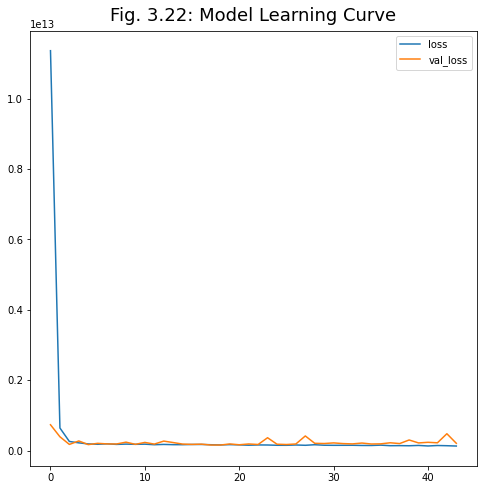

In [685]:
losses = pd.DataFrame(h_model.history.history)
losses[['loss','val_loss']].plot(figsize=(8,8))
plt.title("Fig. 3.22: Model Learning Curve", fontsize=18, pad=10)                                 
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [686]:
predictions = h_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
np.format_float_scientific(rmse)

80/80 [==============================] - 0s 4ms/step


'4.5302754210719635e+05'

In [687]:
explained_variance_score(y_test,predictions)

0.7981592928520801

Text(0.5, 1.0, 'Fig. 3.23: Predicted vs. Actual ')

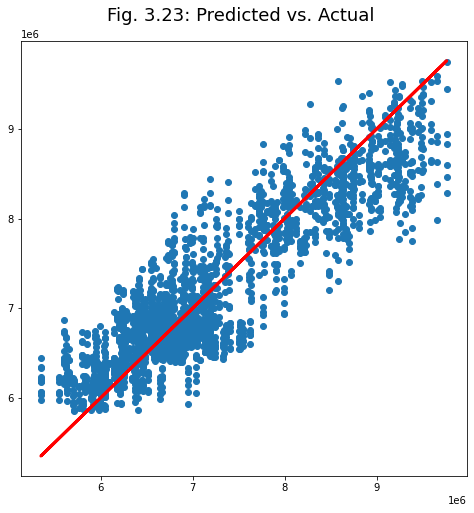

In [725]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.figure(figsize=(8,8))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r', linewidth=3)

plt.title("Fig. 3.23: Predicted vs. Actual ", fontsize=18, pad=20) 

## 3.14 Evaluating Model Performance for Predicting Energy Demand

In [689]:
df_2['Daily Energy Demand'].describe()

count    1.013100e+04
mean     7.165228e+06
std      1.024042e+06
min      5.242117e+06
25%      6.463575e+06
50%      6.892062e+06
75%      7.740056e+06
max      1.051364e+07
Name: Daily Energy Demand, dtype: float64

#### The mean daily energy demand is is 7.17e+06 with a std of 1.02e+06, the model predicts values with a rmse of 4.53 e+05

In [690]:
predictions.shape

(2555, 1)

In [691]:
predictions_df = pd.DataFrame({'predictions': predictions.reshape(2555), 'y_test': y_test.values})
predictions_df['month'] = 'None'

predictions_df.loc[jan_idx, 'month'] = 'January'
predictions_df.loc[feb_idx, 'month'] = 'February'
predictions_df.loc[mar_idx, 'month'] = 'March'
predictions_df.loc[apr_idx, 'month'] = 'April'
predictions_df.loc[may_idx, 'month'] = 'May'
predictions_df.loc[jun_idx, 'month'] = 'June'
predictions_df.loc[jul_idx, 'month'] = 'July'
predictions_df.loc[aug_idx, 'month'] = 'August'
predictions_df.loc[sep_idx, 'month'] = 'September'
predictions_df.loc[oct_idx, 'month'] = 'October'
predictions_df.loc[nov_idx, 'month'] = 'November'
predictions_df.loc[dec_idx, 'month'] = 'December'

In [692]:
predictions.shape

(2555, 1)

In [693]:
type(predictions)

numpy.ndarray

In [694]:
y_test.shape

(2555,)

In [695]:
type(y_test)

pandas.core.series.Series

The predictions is an ndarray of shape 2555 x 1, but the y_test is series of shape 2555. Therefore, the predictions array needs to be reshaped and the y_test needs to be the same data type as predictions.

In [696]:
#predictions.reshape to make it 1D
#y_test.values to make it an ndarray
predictions_df = pd.DataFrame({'predictions': predictions.reshape(2555), 'y_test': y_test.values})

In [697]:
predictions_df.head()

,predictions,y_test
0,7111893.5,7024702.0
1,6849768.5,7024702.0
2,6944267.0,7024702.0
3,7435423.0,7024702.0
4,6994764.5,7024702.0


In [698]:
#creating a column for month
predictions_df['month'] = 'None'

In [699]:
predictions_df.head()

,predictions,y_test,month
0,7111893.5,7024702.0,None
1,6849768.5,7024702.0,None
2,6944267.0,7024702.0,None
3,7435423.0,7024702.0,None
4,6994764.5,7024702.0,None


In [700]:
#populate month column with the string values of the months, the row values are Boolean series defined above
predictions_df.loc[jan_idx, 'month'] = 'January'
predictions_df.loc[feb_idx, 'month'] = 'February'
predictions_df.loc[mar_idx, 'month'] = 'March'
predictions_df.loc[apr_idx, 'month'] = 'April'
predictions_df.loc[may_idx, 'month'] = 'May'
predictions_df.loc[jun_idx, 'month'] = 'June'
predictions_df.loc[jul_idx, 'month'] = 'July'
predictions_df.loc[aug_idx, 'month'] = 'August'
predictions_df.loc[sep_idx, 'month'] = 'September'
predictions_df.loc[oct_idx, 'month'] = 'October'
predictions_df.loc[nov_idx, 'month'] = 'November'
predictions_df.loc[dec_idx, 'month'] = 'December'


In [701]:
predictions_df.head()

,predictions,y_test,month
0,7111893.5,7024702.0,May
1,6849768.5,7024702.0,May
2,6944267.0,7024702.0,May
3,7435423.0,7024702.0,May
4,6994764.5,7024702.0,May


In [702]:
predictions_df[predictions_df['month']== 'None']

,predictions,y_test,month


Great! All of the None values have been filled in with month names and we can easily see how each month is doing with predictions vs. true values. 

In [703]:
predictions_df['residual_squared'] = (predictions_df['predictions']-predictions_df['y_test'])**2

In [704]:
predictions_df.head()

,predictions,y_test,month,residual_squared
0,7111893.5,7024702.0,May,7.602358e+09
1,6849768.5,7024702.0,May,3.060173e+10
2,6944267.0,7024702.0,May,6.469789e+09
3,7435423.0,7024702.0,May,1.686917e+11
4,6994764.5,7024702.0,May,8.962539e+08


In [705]:
rmse_bymonth = np.sqrt(predictions_df.groupby('month')['residual_squared'].mean())
rmse_df = pd.DataFrame({'Month':rmse_bymonth.index, 'RMSE': rmse_bymonth.values})

In [706]:
rmse_bymonth.values

array([609946.44938704, 487531.10179765, 584125.90148454, 180950.62102623,
       188500.69393419, 600076.99492622, 587108.60692775, 348897.52835876,
       395859.26359885, 248408.9236348 , 352528.76367002, 514666.92357669])

In [707]:
rmse_df.head()

,Month,RMSE
0,April,609946.449387
1,August,487531.101798
2,December,584125.901485
3,February,180950.621026
4,January,188500.693934


In [708]:
#sanity check to make sure numbers match up
np.sqrt(predictions_df[predictions_df['month']=='April']['residual_squared'].mean())

609946.4493870441

In [709]:
#counting the number of testing data points for each month
predictions_df.groupby('month').count()

,predictions,y_test,residual_squared
month,,,
April,210,210,210
August,217,217,217
December,217,217,217
February,196,196,196
January,217,217,217
July,217,217,217
June,210,210,210
March,217,217,217
May,217,217,217


Text(0.5, 1.0, 'Fig. 3.24: RMSE Average of All the Days in Each Month ')

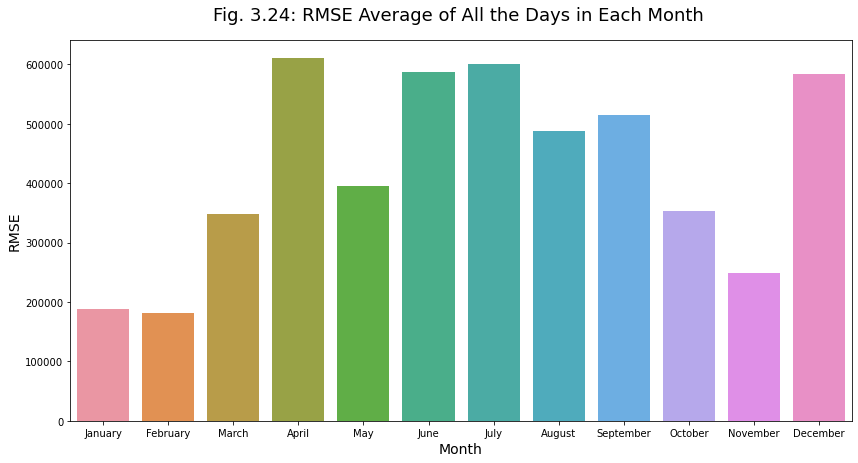

In [711]:
plt.figure(figsize=(14,7))
sns.barplot(data=rmse_df, x='Month', order=monthorder, y='RMSE')
plt.title("Fig. 3.24: RMSE Average of All the Days in Each Month ", fontsize=18, pad=20) 

In [726]:
rmse_df.sort_values('RMSE')

,Month,RMSE
3,February,180950.621026
4,January,188500.693934
9,November,248408.923635
7,March,348897.528359
10,October,352528.763670
8,May,395859.263599
1,August,487531.101798
11,September,514666.923577
2,December,584125.901485
6,June,587108.606928


The RMSE values here give some insight into how accurate the daily predicted energy is. The RMSE is highest in April and July and lowest in January and February. There are potentially missing explanatory features in the data set that are related to the months with the highest RMSE. Things like school being out of session, holidays and wildfires are not accounted for in the features. 

In addition, not all hot days are created equal. A hot day in the middle of a heat wave is likely to use more energy than an isolated hot day. This compounding effect is not going to be well-captured by a neural network like this. There are neural networks that are better designed for capturing dependences through time (e.g., long short-term memory networks).

Let's see how the model is doing for predicting the average energy demand per month.
For plotting purposes, it is useful to have all of the energy demand values (both predicted and true) in a single column, with a second column distinguishing whether they were predicted or true values.

In [713]:
predictions_df

,predictions,y_test,month,residual_squared
0,7111893.5,7024702.0,May,7.602358e+09
1,6849768.5,7024702.0,May,3.060173e+10
2,6944267.0,7024702.0,May,6.469789e+09
3,7435423.0,7024702.0,May,1.686917e+11
4,6994764.5,7024702.0,May,8.962539e+08
...,...,...,...,...
2550,7626579.5,6777355.0,May,7.211823e+11
2551,7629850.5,6777355.0,May,7.267486e+11
2552,7237412.5,6777355.0,May,2.116529e+11
2553,7707141.0,6777355.0,May,8.645020e+11


In [714]:
#creating two smaller dataframes that will eventually be concatenated
y_test_df= predictions_df.loc[:,['y_test', 'month']]
y_test_df['Type']= 'y_test'
y_test_df = y_test_df.rename(columns={'y_test': 'Daily Energy Demand', 'month':'Month'})

predictions_df2= predictions_df.loc[:,['predictions', 'month']]
predictions_df2['Type']= 'predicted'
predictions_df2 = predictions_df2.rename(columns={'predictions': 'Daily Energy Demand', 'month':'Month'})

In [715]:
y_test_df.head()

,Daily Energy Demand,Month,Type
0,7024702.0,May,y_test
1,7024702.0,May,y_test
2,7024702.0,May,y_test
3,7024702.0,May,y_test
4,7024702.0,May,y_test


In [716]:
predictions_df2.head()

,Daily Energy Demand,Month,Type
0,7111893.5,May,predicted
1,6849768.5,May,predicted
2,6944267.0,May,predicted
3,7435423.0,May,predicted
4,6994764.5,May,predicted


In [717]:
len(predictions_df2)

2555

In [718]:
len(y_test_df)

2555

Great! Both of the smaller dataframe's are the same length, as we would expect, and have the same column names so they can easily be concatened into one large dataframe and then plotted.

In [719]:
plotting_preds=pd.concat([predictions_df2,y_test_df], axis=0)

In [720]:
plotting_preds.head()

,Daily Energy Demand,Month,Type
0,7111893.5,May,predicted
1,6849768.5,May,predicted
2,6944267.0,May,predicted
3,7435423.0,May,predicted
4,6994764.5,May,predicted


In [721]:
#sanity check
len(plotting_preds)

5110

Text(0.5, 1.0, 'Fig. 3.25: Model Performance of Average Energy Demand per Month ')

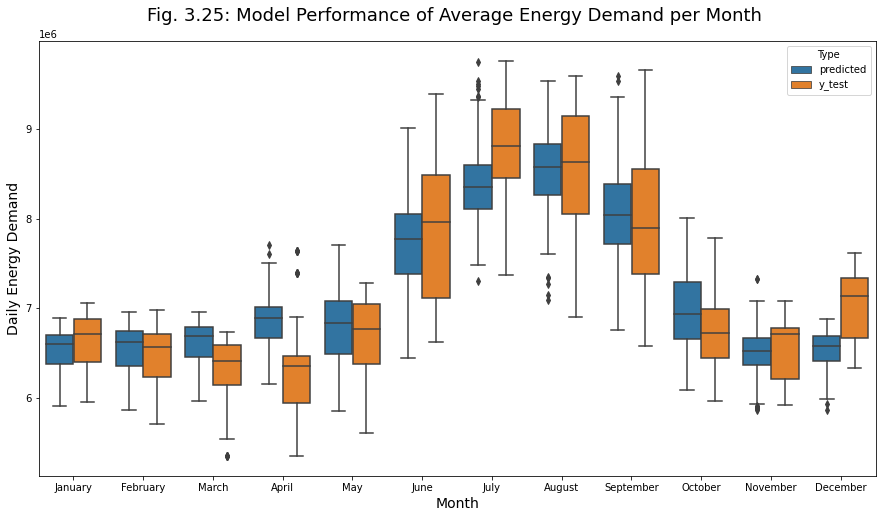

In [722]:
plt.figure(figsize=(15,8))
sns.boxplot(data=plotting_preds, x='Month', y='Daily Energy Demand', order=monthorder, hue='Type')
plt.title("Fig. 3.25: Model Performance of Average Energy Demand per Month ", fontsize=18, pad=20) 

This graph shows the monthly average energy demand compared to the predicted monthly average demand.

April was less demanding of energy than the model anticipated, but for other months the model was pretty good at predicting values in the correct range. The distribution of the predicted monthly average energy demand was actually less than the actual distribution in most cases, but there is still decent overlap between the predicted and true values for most months. The RMSE values in Figure 3.24 show that the model was the worst at predicting day-to-day error for the months of April and July, and that is also reflected in this graph where the predicted monthly distribution of values has little overlap  with the actual distribution for the values. 


Next steps: Comparison of model predictions to California ISO forecasted demand (coming soon).

Thanks for checking out my project :)